# Background & Context

    The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

    Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

    You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

    You need to identify the best possible model that will give the required performance

### Objective

    Explore and visualize the dataset.
    Build a classification model to predict if the customer is going to churn or not
    Optimize the model using appropriate techniques
    Generate a set of insights and recommendations that will help the bank

### Data Dictionary:

    CLIENTNUM: Client number. Unique identifier for the customer holding the account
    Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
    Customer_Age: Age in Years
    Gender: Gender of the account holder
    Dependent_count: Number of dependents
    Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
    Marital_Status: Marital Status of the account holder
    Income_Category: Annual Income Category of the account holder
    Card_Category: Type of Card
    Months_on_book: Period of relationship with the bank
    Total_Relationship_Count: Total no. of products held by the customer
    Months_Inactive_12_mon: No. of months inactive in the last 12 months
    Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
    Credit_Limit: Credit Limit on the Credit Card
    Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
    Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
    Total_Trans_Amt: Total Transaction Amount (Last 12 months)
    Total_Trans_Ct: Total Transaction Count (Last 12 months)
    Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
    Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
    Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

### Loading Data

In [2]:
# Read the data file
data = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [3]:
# inspecting shape of dataset
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

### Data set has 10127 rows and 21 columns

## Data Overview

In [4]:
# Creating a copy of data object
bcData = data.copy()

<IPython.core.display.Javascript object>

### Checking Head and tail of data set

In [5]:
# Inspecting top 5 rows
bcData.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [6]:
# Inspecting last 5 rows
bcData.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

In [7]:
# Inspecting columsn data types and missign feature values
bcData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

* Total records for each feature is 10127 but Education_level and Martial_Status has missign values.
* CLIENTNUM is unique identifier for customer. which will not contribute to model building. we can drop this column.
* These features are type object: Attrition_Flag, Gender, Education_Level,  Marital_Status, Income_Category and 
  Card_Category. Which is categorical feature.
* Remaining columns are numeric fields either integer or number.

In [8]:
# let's check for duplicate values in the data
bcData.duplicated().sum()

0

<IPython.core.display.Javascript object>

There is no duplicate rows.

In [9]:
# Check for missing values ratio for features
round(bcData.isnull().sum() / bcData.isnull().count() * 100)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.000
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

* Education_Level has 15% data missing.
* Martial_status has 7% data missing.
* Remaining featues has no data missing.

In [10]:
# let's view the statistical summary of the numerical columns in the data
bcData.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

<IPython.core.display.Javascript object>

* Customer_Age, Months_on_book and Total_Ct_Chng_Q4_Q1 close to normal.
* Credit_Limit and Avg_Open_To_Buy has same max limit which is obvious.
* Credit_Limit, Avg_Open_To_Buy and Total_Trans_Amt has large range of value. 
* Dependent_count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Avg_Open_To_Buy, 
  Total_Amt_Chng_Q4_Q1, Total_Trans_Amt and Avg_Utilization_Ratio are right skewed
* Total_Relationship_Count, Total_Revolving_Bal and Total_Trans_Ct are left skewed.

## Data Preprocessing

### Dropping CLIENTNUM column, Since its not adding any infromation to model

In [11]:
bcData.drop(columns=["CLIENTNUM"], inplace=True)

<IPython.core.display.Javascript object>

In [12]:
# Analyzing the categorical variables in data
cats = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# Printing unique values in each category
for cat in cats:
    print(bcData[cat].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

* Education_Level Post-Graduate and Doctorate can be merged to single Post-Graduate degree.
* Income_Category has one class 'abc'. Which looks like intentionally input value. we'll convert  it to 'Unknown'.
* As previously noticed , Education_Level and Marital_Status has missign value. Lets inspect if it is related to 
  'abc' Income_Category.

In [13]:
bcData[
    (bcData["Income_Category"] == "abc")
    | (bcData["Education_Level"].isnull())
    | (bcData["Marital_Status"].isnull())
]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
3      Existing Customer            40      F                4   
6      Existing Customer            51      M                4   
7      Existing Customer            32      M                0   
10     Existing Customer            42      M                5   
11     Existing Customer            65      M                1   
...                  ...           ...    ...              ...   
10101  Existing Customer            42      M                2   
10118  Attrited Customer            50      M                1   
10119  Attrited Customer            55      F                3   
10123  Attrited Customer            41      M                2   
10125  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
3         High School            NaN  Less than $40K          Blue   
6                 NaN        Married         $120K +          Gold   
7         High School            NaN     $60K - $80K        Silver   
10         Uneducated            NaN         $120K +          Blue   
11                NaN        Married     $40K - $60K          Blue   
...               ...            ...             ...           ...   
10101        Graduate            NaN     $40K - $60K          Blue   
10118             NaN            NaN    $80K - $120K          Blue   
10119      Uneducated         Single             abc          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
3                  34                         3                       4   
6                  46                         6                       1   
7                  27                         2                       2   
10                 31                         5                       3   
11                 54                         6                       2   
...               ...                       ...                     ...   
10101              30                         3                       2   
10118              36                         6                       3   
10119              47                         4                       3   
10123              25                         4                       2   
10125              36                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
3                          1      3313.000                 2517   
6                          3     34516.000                 2264   
7                          2     29081.000                 1396   
10                         2      6748.000                 1467   
11                         3      9095.000                 1587   
...                      ...           ...                  ...   
10101                      5      3735.000                 1723   
10118                      4      9959.000                  952   
10119                      3     14657.000                 2517   
10123                      3      4277.000                 2186   
10125                      3      5281.000                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3              796.000                 1.405             1171              20   
6            32252.000                 1.975             1330              31   
7            27685.000                 2.204             1538              36   
10            5281.000                 0.831             1201              42   
11            7508.000                 1.433             1314              26   
...                ...                   ...              ...             ...   
10101         2012.000                 0.595            14501              92   
10118         9007.000

<IPython.core.display.Javascript object>

* We can see there is no particular pattern missing records or invalid income category. And result of query 
  gives 3046 records. So we'll treat these features separately for missing values.

In [14]:
# Merging Education_Level: Post-Graduate and Doctorate into Post-Graduate
bcData["Education_Level"] = bcData["Education_Level"].replace(
    ["Doctorate"], "Post-Graduate"
)

<IPython.core.display.Javascript object>

In [15]:
# Replacing Income_Category = 'abc' with 'Unknown'
bcData["Income_Category"] = bcData["Income_Category"].replace(["abc"], "Unknown")

<IPython.core.display.Javascript object>

In [16]:
# Printing unique values in each category
for cat in cats:
    print(bcData[cat].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     967
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

## EDA

### Univariate

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

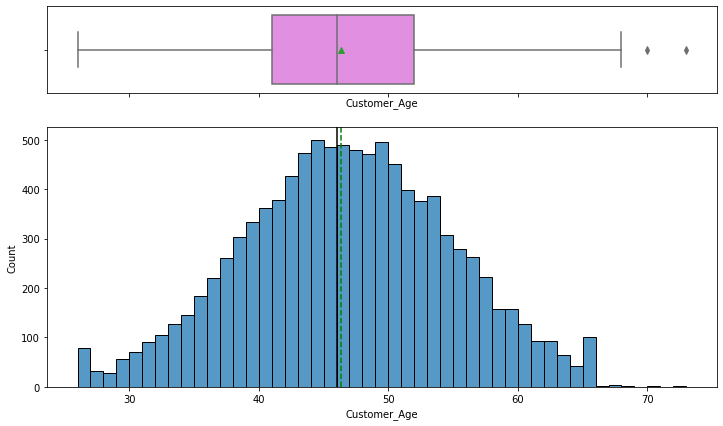

<IPython.core.display.Javascript object>

In [18]:
# Observations on Customer age
histogram_boxplot(bcData, "Customer_Age")

* Age seems to be normally distributed.However there are some outliers 
* We can cap the value of the variable to the next highest value.

In [19]:
# Checking 10 largest values of age
bcData.Customer_Age.nlargest(10)

251    73
254    70
151    68
198    68
177    67
320    67
410    67
432    67
39     66
52     66
Name: Customer_Age, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
bcData[bcData["Customer_Age"] > 66]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
151  Existing Customer            68      M                1        Graduate   
177  Existing Customer            67      F                1        Graduate   
198  Attrited Customer            68      M                0     High School   
251  Existing Customer            73      M                0     High School   
254  Existing Customer            70      M                0     High School   
320  Existing Customer            67      M                0        Graduate   
410  Existing Customer            67      M                1      Uneducated   
432  Existing Customer            67      F                0             NaN   

    Marital_Status Income_Category Card_Category  Months_on_book  \
151        Married         Unknown          Blue              56   
177        Married  Less than $40K          Blue              56   
198        Married  Less than $40K          Blue              52   
251        Married     $40K - $60K          Blue              36   
254        Married  Less than $40K          Blue              56   
320        Married     $40K - $60K          Blue              56   
410        Married     $40K - $60K          Blue              49   
432        Married         Unknown          Blue              56   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
151                         5                       2                      3   
177                         4                       3                      2   
198                         1                       3                      2   
251                         5                       3                      2   
254                         3                       2                      3   
320                         4                       2                      1   
410                         4                       3                      2   
432                         4                       3                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
151     13860.000                 1652        12208.000                 1.255   
177      3006.000                 2517          489.000                 2.053   
198      1438.300                  900          538.300                 0.743   
251      4469.000                 1125         3344.000                 1.363   
254      3252.000                 1495         1757.000                 0.581   
320      5876.000                 1297         4579.000                 1.012   
410      3106.000                 1675         1431.000                 0.781   
432     10509.000                 2388         8121.000                 0.777   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
151             1910              32                1.909   
177             1661              32                1.000   
198              760              21                0.615   
251             1765              34                1.615   
254             1227              15                0.875   
320             2133              55                0.719   
410             1512              38                0.407   
432             1365              34                1.429   

     Avg_Utilization_Ratio  
151                  0.119  
177                  0.837  
198                  0.626  
251                  0.252  
254                  0.460  
320                  0.221  
410                  0.539  
432                  0.227

<IPython.core.display.Javascript object>

- Values of the two of the Customer_Age need not be incorrect. Dropping them will lead us to loss of information.
- Let's cap them with next highest value.

In [21]:
bcData["Customer_Age"].clip(upper=66, inplace=True)

<IPython.core.display.Javascript object>

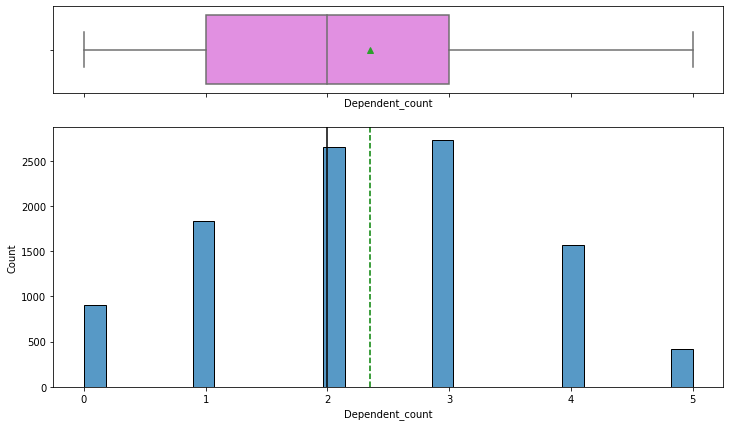

<IPython.core.display.Javascript object>

In [22]:
# Observations on Customer age
histogram_boxplot(bcData, "Dependent_count")

* Average dependent count is 2.
* Data seems to be normally distributed and there is no outliers in record.

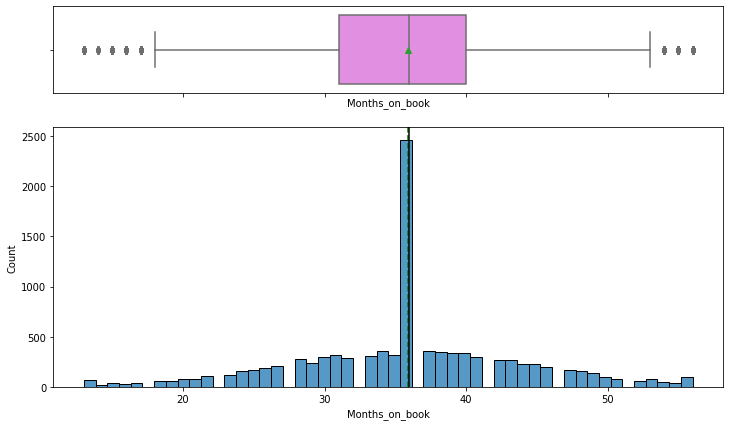

<IPython.core.display.Javascript object>

In [23]:
# Observations on Months_on_book
histogram_boxplot(bcData, "Months_on_book")

* Average Months_on_book count is 36, which is extremly high compared to the values left and right of it.
* Data is symatrically distributed but there are left and right outliers.
* We will not treat them as this represents a period of relationship with the bank.

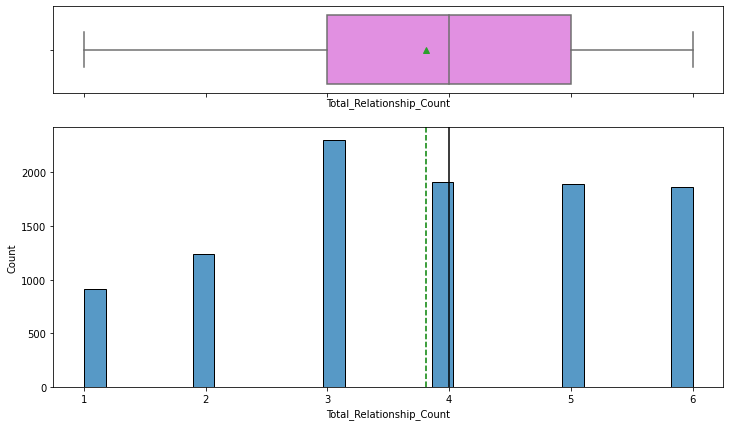

<IPython.core.display.Javascript object>

In [24]:
# Observations on Total_Relationship_Count
histogram_boxplot(bcData, "Total_Relationship_Count")

* Average relationship count is 4.
* There is no outliers in record.

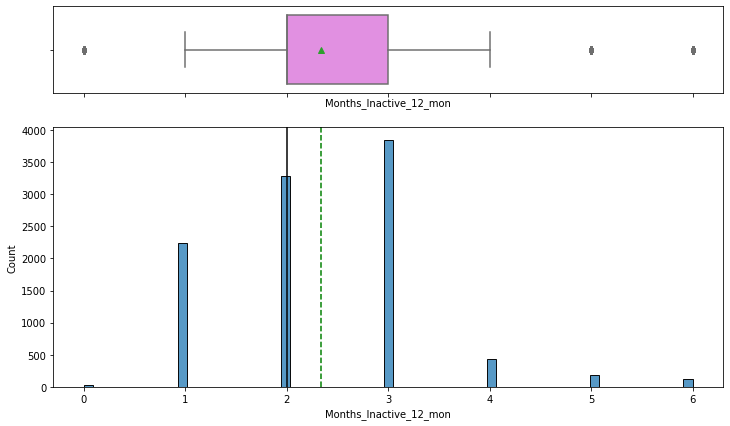

<IPython.core.display.Javascript object>

In [25]:
# Observations on Months_Inactive_12_mon
histogram_boxplot(bcData, "Months_Inactive_12_mon")

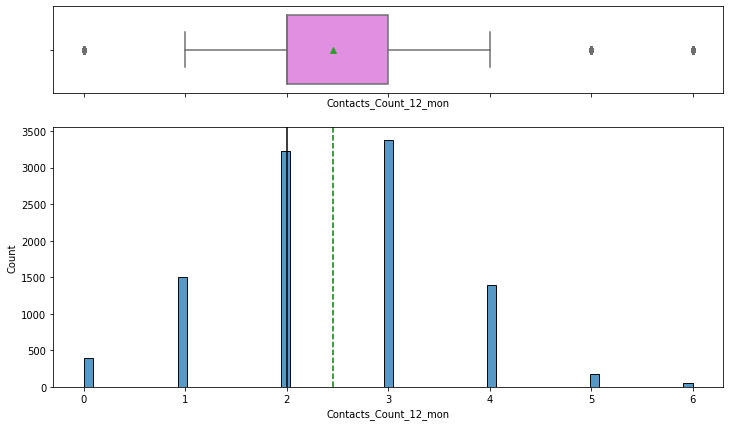

<IPython.core.display.Javascript object>

In [26]:
# Observations on Contacts_Count_12_mon
histogram_boxplot(bcData, "Contacts_Count_12_mon")

* Average contacts count is 2.
* There seems to be outlier but We will not treat them as this represents No. of Contacts between the customer 
  and bank in the last 12 months.

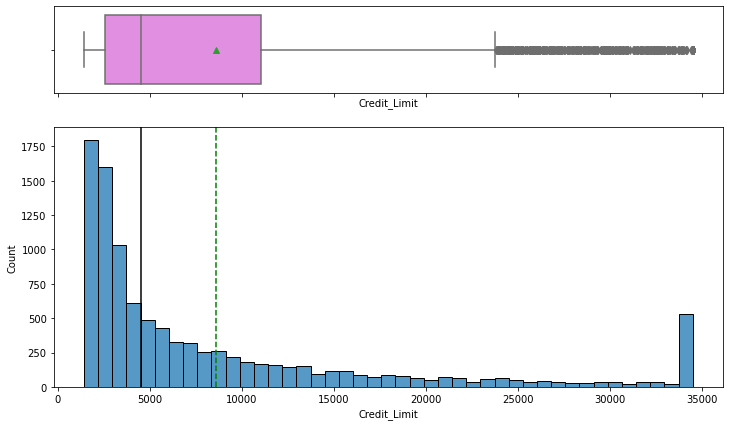

<IPython.core.display.Javascript object>

In [27]:
# Observations on Credit_Limit
histogram_boxplot(bcData, "Credit_Limit")

* Average credit limit is 5000.
* Data is heavily right skewed.
* There seems to be outlier but We will not treat them as this credit limit for each of the customer.

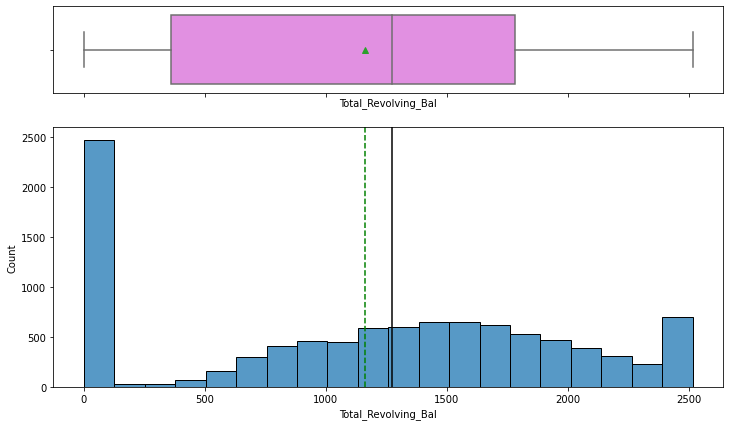

<IPython.core.display.Javascript object>

In [28]:
# Observations on Total_Revolving_Bal
histogram_boxplot(bcData, "Total_Revolving_Bal")

* Total_Revolving balnce is slightly right skewed.But there is no ouliers
* Count for 0 total revolving balance is obvious because many customer pays the balance on time therefore their 
  balance is 0.

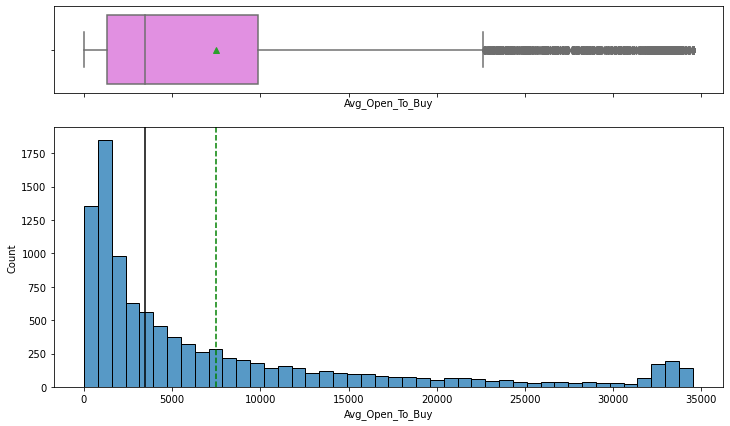

<IPython.core.display.Javascript object>

In [29]:
# Observations on Avg_Open_To_Buy
histogram_boxplot(bcData, "Avg_Open_To_Buy")

* Data is left skewed i.e many customers are usign credit card heavily.
* There is many outliers on right. But We will not treat them because this represents the 
  customer spending behaviour.

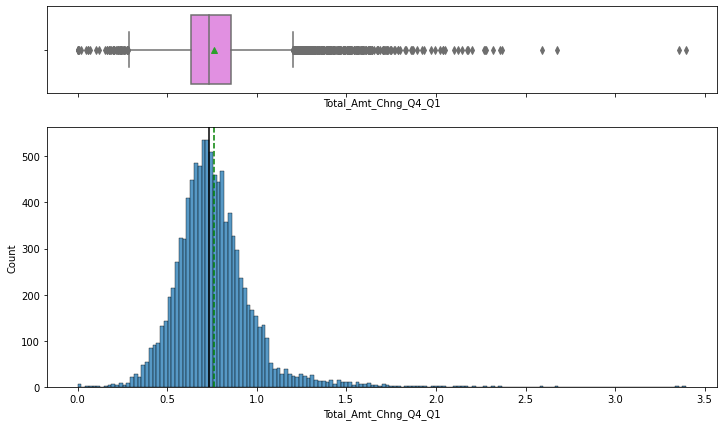

<IPython.core.display.Javascript object>

In [30]:
# Observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(bcData, "Total_Amt_Chng_Q4_Q1")

* Data is normally distributed.
* There is left and right outliers but we'll treat only for right outliers where data is spread more.
* Treating any value greater than 2.25 and capping it with 2.25.

In [31]:
# Checking values greate than 2.25
bcData[bcData["Total_Amt_Chng_Q4_Q1"] > 2.25]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
2    Existing Customer            51      M                3        Graduate   
8    Existing Customer            37      M                3      Uneducated   
12   Existing Customer            56      M                1         College   
46   Existing Customer            56      M                2   Post-Graduate   
47   Existing Customer            59      M                1   Post-Graduate   
58   Existing Customer            44      F                5        Graduate   
219  Existing Customer            44      F                3      Uneducated   
466  Existing Customer            63      M                2        Graduate   
658  Existing Customer            46      M                4        Graduate   
773  Existing Customer            61      M                0   Post-Graduate   

    Marital_Status Income_Category Card_Category  Months_on_book  \
2          Married    $80K - $120K          Blue              36   
8           Single     $60K - $80K          Blue              36   
12          Single    $80K - $120K          Blue              36   
46         Married     $60K - $80K          Blue              45   
47         Married     $40K - $60K          Blue              52   
58         Married         Unknown          Blue              35   
219       Divorced  Less than $40K        Silver              38   
466        Married     $60K - $80K          Blue              49   
658        Married     $60K - $80K          Blue              35   
773        Married         Unknown          Blue              53   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
2                           4                       1                      0   
8                           5                       2                      0   
12                          3                       6                      0   
46                          6                       2                      0   
47                          3                       2                      2   
58                          4                       1                      2   
219                         4                       1                      3   
466                         5                       2                      3   
658                         5                       1                      2   
773                         6                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
2        3418.000                    0         3418.000                 2.594   
8       22352.000                 2517        19835.000                 3.355   
12      11751.000                    0        11751.000                 3.397   
46       2283.000                 1430          853.000                 2.316   
47       2548.000                 2020          528.000                 2.357   
58       6273.000                  978         5295.000                 2.275   
219     11127.000                 1835         9292.000                 2.368   
466     14035.000                 2061        11974.000                 2.271   
658      1535.000                  700          835.000                 2.282   
773     14434.000                 1927        12507.000                 2.675   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
2               1887              20                2.333   
8               1350              24                1.182   
12              1539              17                3.250   
46              1741              27                0.588   
47              1719              27                1.700   
58              1359              25                1.083   
219             1546              25                1.273   
466             1606              30                1.500   
658             1848              25                1.08

<IPython.core.display.Javascript object>

* There are 10 outliers, these observations need not be incorrect, dropping them will lead to loss of information.
* Let's cap them with next closet highest value 2.25.

In [32]:
bcData.Total_Amt_Chng_Q4_Q1.clip(upper=2.25, inplace=True)

<IPython.core.display.Javascript object>

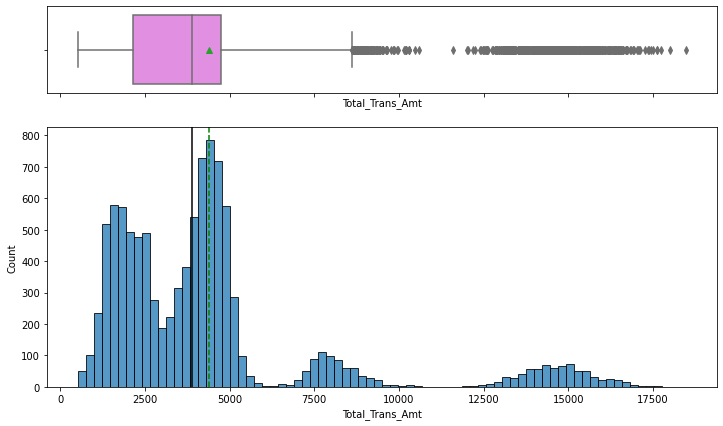

<IPython.core.display.Javascript object>

In [33]:
# Observations on Total_Trans_Amt
histogram_boxplot(bcData, "Total_Trans_Amt")

* Total transction amount is left skewed.
* There is outliers at right with close groups.
* We can loose information if we treat them.

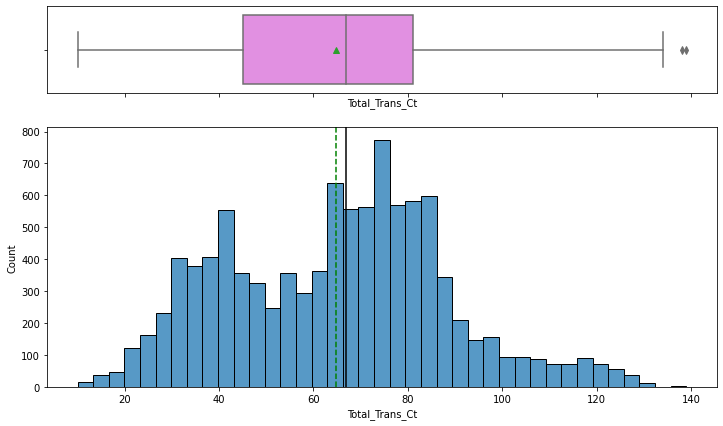

<IPython.core.display.Javascript object>

In [34]:
# Observations on Total_Trans_Ct
histogram_boxplot(bcData, "Total_Trans_Ct")

* Data is slightly right skewed.
* There are some outliers. We can cap these extreme values.

In [35]:
# Checking values greater than 134
bcData[bcData["Total_Trans_Ct"] > 134]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9324  Existing Customer            41      M                3             NaN   
9586  Existing Customer            56      F                1     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9324        Married         $120K +          Blue              33   
9586        Married         Unknown          Blue              49   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9324                         2                       4                      3   
9586                         1                       2                      1   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9324     34516.000                  638        33878.000   
9586     17542.000                 2517        15025.000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9324                 0.724            13085             139   
9586                 0.800            13939             138   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9324                0.675                  0.018  
9586                0.792                  0.143

<IPython.core.display.Javascript object>

- There are 2 Total_Trans_Ct which need not be incorrect.
- So, dropping them will lead us to loss of information
- We'll cap them with next highest value.

In [36]:
# Capping values for 134
data["Total_Trans_Ct"].clip(upper=134, inplace=True)

<IPython.core.display.Javascript object>

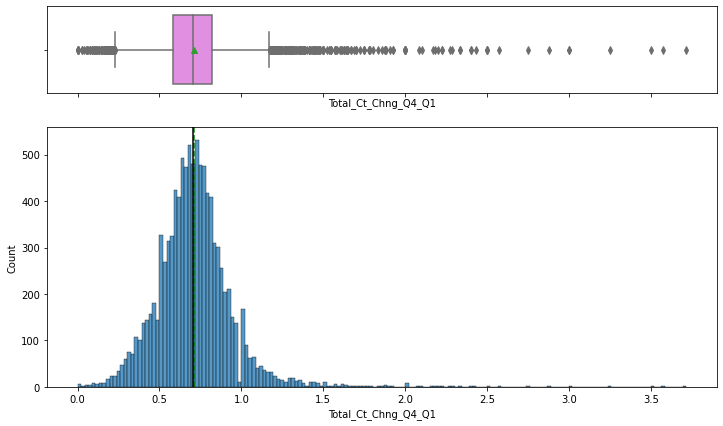

<IPython.core.display.Javascript object>

In [37]:
# Observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(bcData, "Total_Ct_Chng_Q4_Q1")

* Data is normally distributed.
* There is right outliers with large spread.
* Treating any value greater than 2.5 and capping it with 2.5

In [38]:
# Checking values greate than 2.5
bcData[bcData["Total_Ct_Chng_Q4_Q1"] > 2.5]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
1    Existing Customer            49      F                5        Graduate   
12   Existing Customer            56      M                1         College   
30   Existing Customer            53      M                3             NaN   
113  Existing Customer            54      F                0      Uneducated   
146  Existing Customer            41      F                2        Graduate   
190  Existing Customer            57      M                1        Graduate   
269  Existing Customer            54      M                5        Graduate   
366  Existing Customer            36      F                4        Graduate   
773  Existing Customer            61      M                0   Post-Graduate   

    Marital_Status Income_Category Card_Category  Months_on_book  \
1           Single  Less than $40K          Blue              44   
12          Single    $80K - $120K          Blue              36   
30         Married    $80K - $120K          Blue              33   
113        Married  Less than $40K          Blue              36   
146         Single  Less than $40K          Blue              32   
190        Married    $80K - $120K          Blue              47   
269        Married     $60K - $80K          Blue              38   
366        Married     $40K - $60K          Blue              36   
773        Married         Unknown          Blue              53   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1                           6                       1                      2   
12                          3                       6                      0   
30                          3                       2                      3   
113                         2                       2                      2   
146                         6                       3                      2   
190                         5                       3                      1   
269                         3                       3                      3   
366                         6                       3                      3   
773                         6                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
1        8256.000                  864         7392.000                 1.541   
12      11751.000                    0        11751.000                 2.250   
30       2753.000                 1811          942.000                 0.977   
113      1494.000                  706          788.000                 1.674   
146      2250.000                 2117          133.000                 1.162   
190     14612.000                 1976        12636.000                 1.768   
269      2290.000                 1434          856.000                 0.923   
366      1628.000                  969          659.000                 0.999   
773     14434.000                 1927        12507.000                 2.250   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
1               1291              33                3.714   
12              1539              17                3.250   
30              1038              25                2.571   
113             1305              24                3.000   
146             1617              31                2.875   
190             1827              24                3.000   
269             1119              18                3.500   
366             1893              15                2.750   
773             1731              32                3.571   

     Avg_Utilization_Ratio  
1                    0.105  
12                   0.000  
30                   0.658  
113                  0.473  
146                  0.941  
190                  0.135  
269                  0.626  
366                  0.595  
773                  0.134

<IPython.core.display.Javascript object>

In [39]:
bcData.Total_Ct_Chng_Q4_Q1.clip(upper=2.5, inplace=True)

<IPython.core.display.Javascript object>

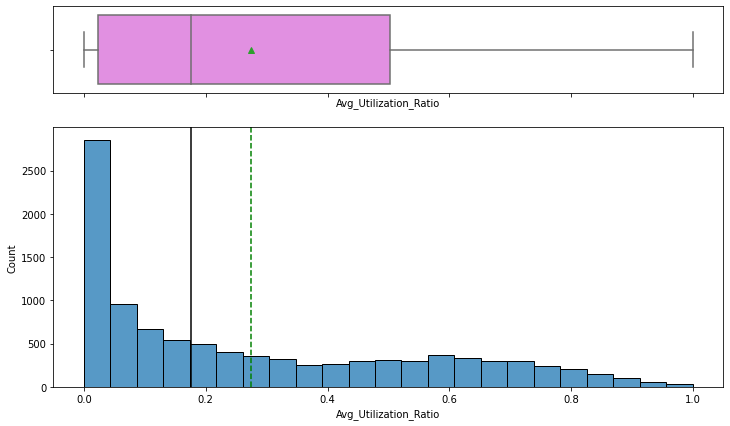

<IPython.core.display.Javascript object>

In [40]:
# Observations on Avg_Utilization_Ratio
histogram_boxplot(bcData, "Avg_Utilization_Ratio")

* Data is left skewed.
* Average utilization ratio for majority of customer is 0.
* There is no outliers in record.

In [41]:
# function to create labeled barplots


def labeled_barplot(data, feature, n=None):
    """
    Barplot with percentage and count at the top

    data: dataframe
    feature: dataframe column
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    perc = 0
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        perc = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height() + 40  # height of the plot

        ax.annotate(
            perc + " / " + str(label),
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

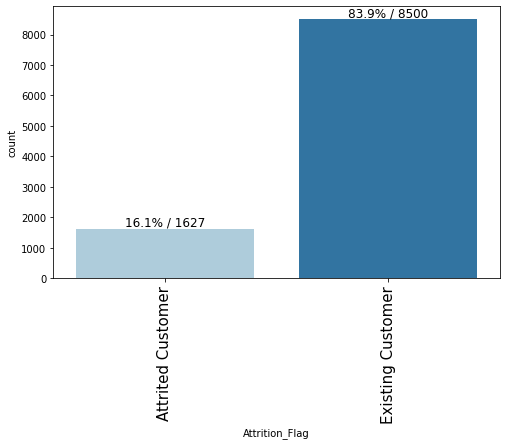

<IPython.core.display.Javascript object>

In [42]:
# Observations on Marital_Status
labeled_barplot(bcData, "Attrition_Flag", 7)

- 84% of customer is existing customer.
- 16% of customer is Attributed customer, there is imbalance in data of Attributed customer.

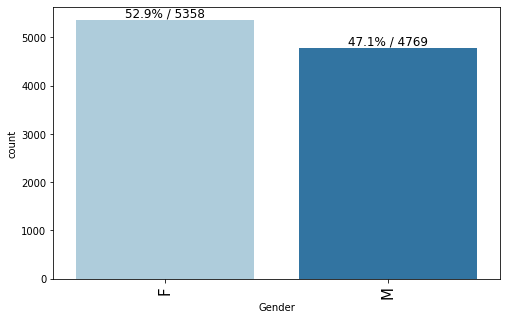

<IPython.core.display.Javascript object>

In [43]:
# Observations on Gender
labeled_barplot(bcData, "Gender", 7)

- Female customer is almost 6% more than male customer.

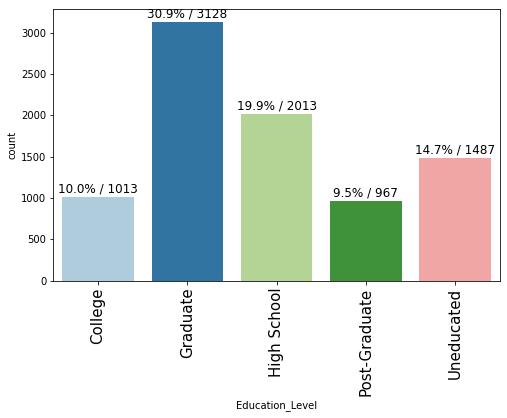

<IPython.core.display.Javascript object>

In [44]:
# Observations on Education_Level
labeled_barplot(bcData, "Education_Level", 7)

- Almost 31% of customers are graduate 
- College and Post-Graduate are almost equal. Which is one third of Graduate customers.

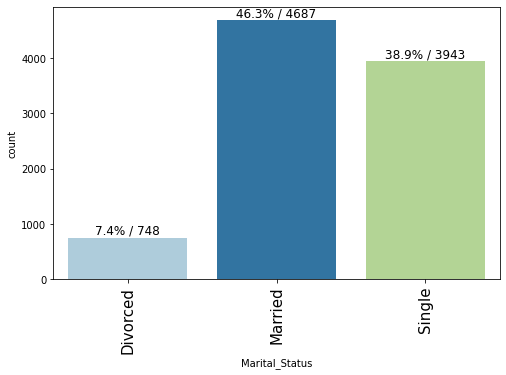

<IPython.core.display.Javascript object>

In [45]:
# Observations on Marital_Status
labeled_barplot(bcData, "Marital_Status", 7)

- 46% of customers are married.
- There is 7.5% customers are divorced and 39% customers are single. 

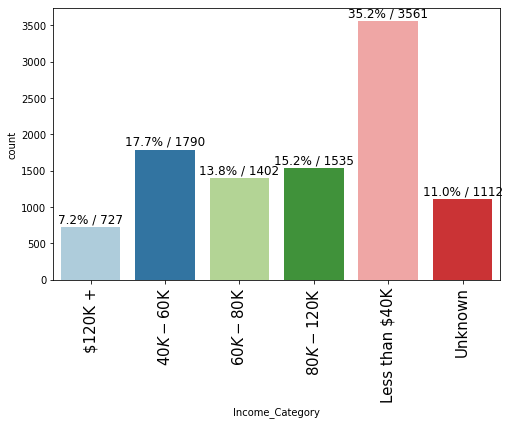

<IPython.core.display.Javascript object>

In [46]:
# Observations on Income_Category
labeled_barplot(bcData, "Income_Category", 7)

* 35% of customers has less than 40k annual income.
* Almost 7% of customers has 120k which is high income group and may be spending/high number of transcations.
* There is 11% customer whos income is not reported properly. which is large number for data set. We'll try to investigate and fill with appropriate values.

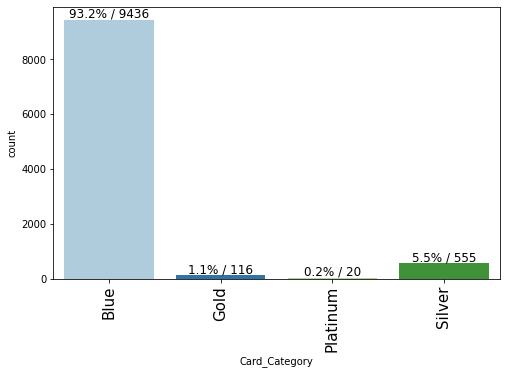

<IPython.core.display.Javascript object>

In [47]:
# Observations on Card_Category
labeled_barplot(bcData, "Card_Category", 7)

* 93% customers a has credit card of type Blue category. 
* Very fee number of customer 1.1% - Gold and 0.2% - Platinum are premium customers.
* Silver category is next to Blue category but it has only 5.5% customer which is much less than Blue category.

### Bivariate Analysis

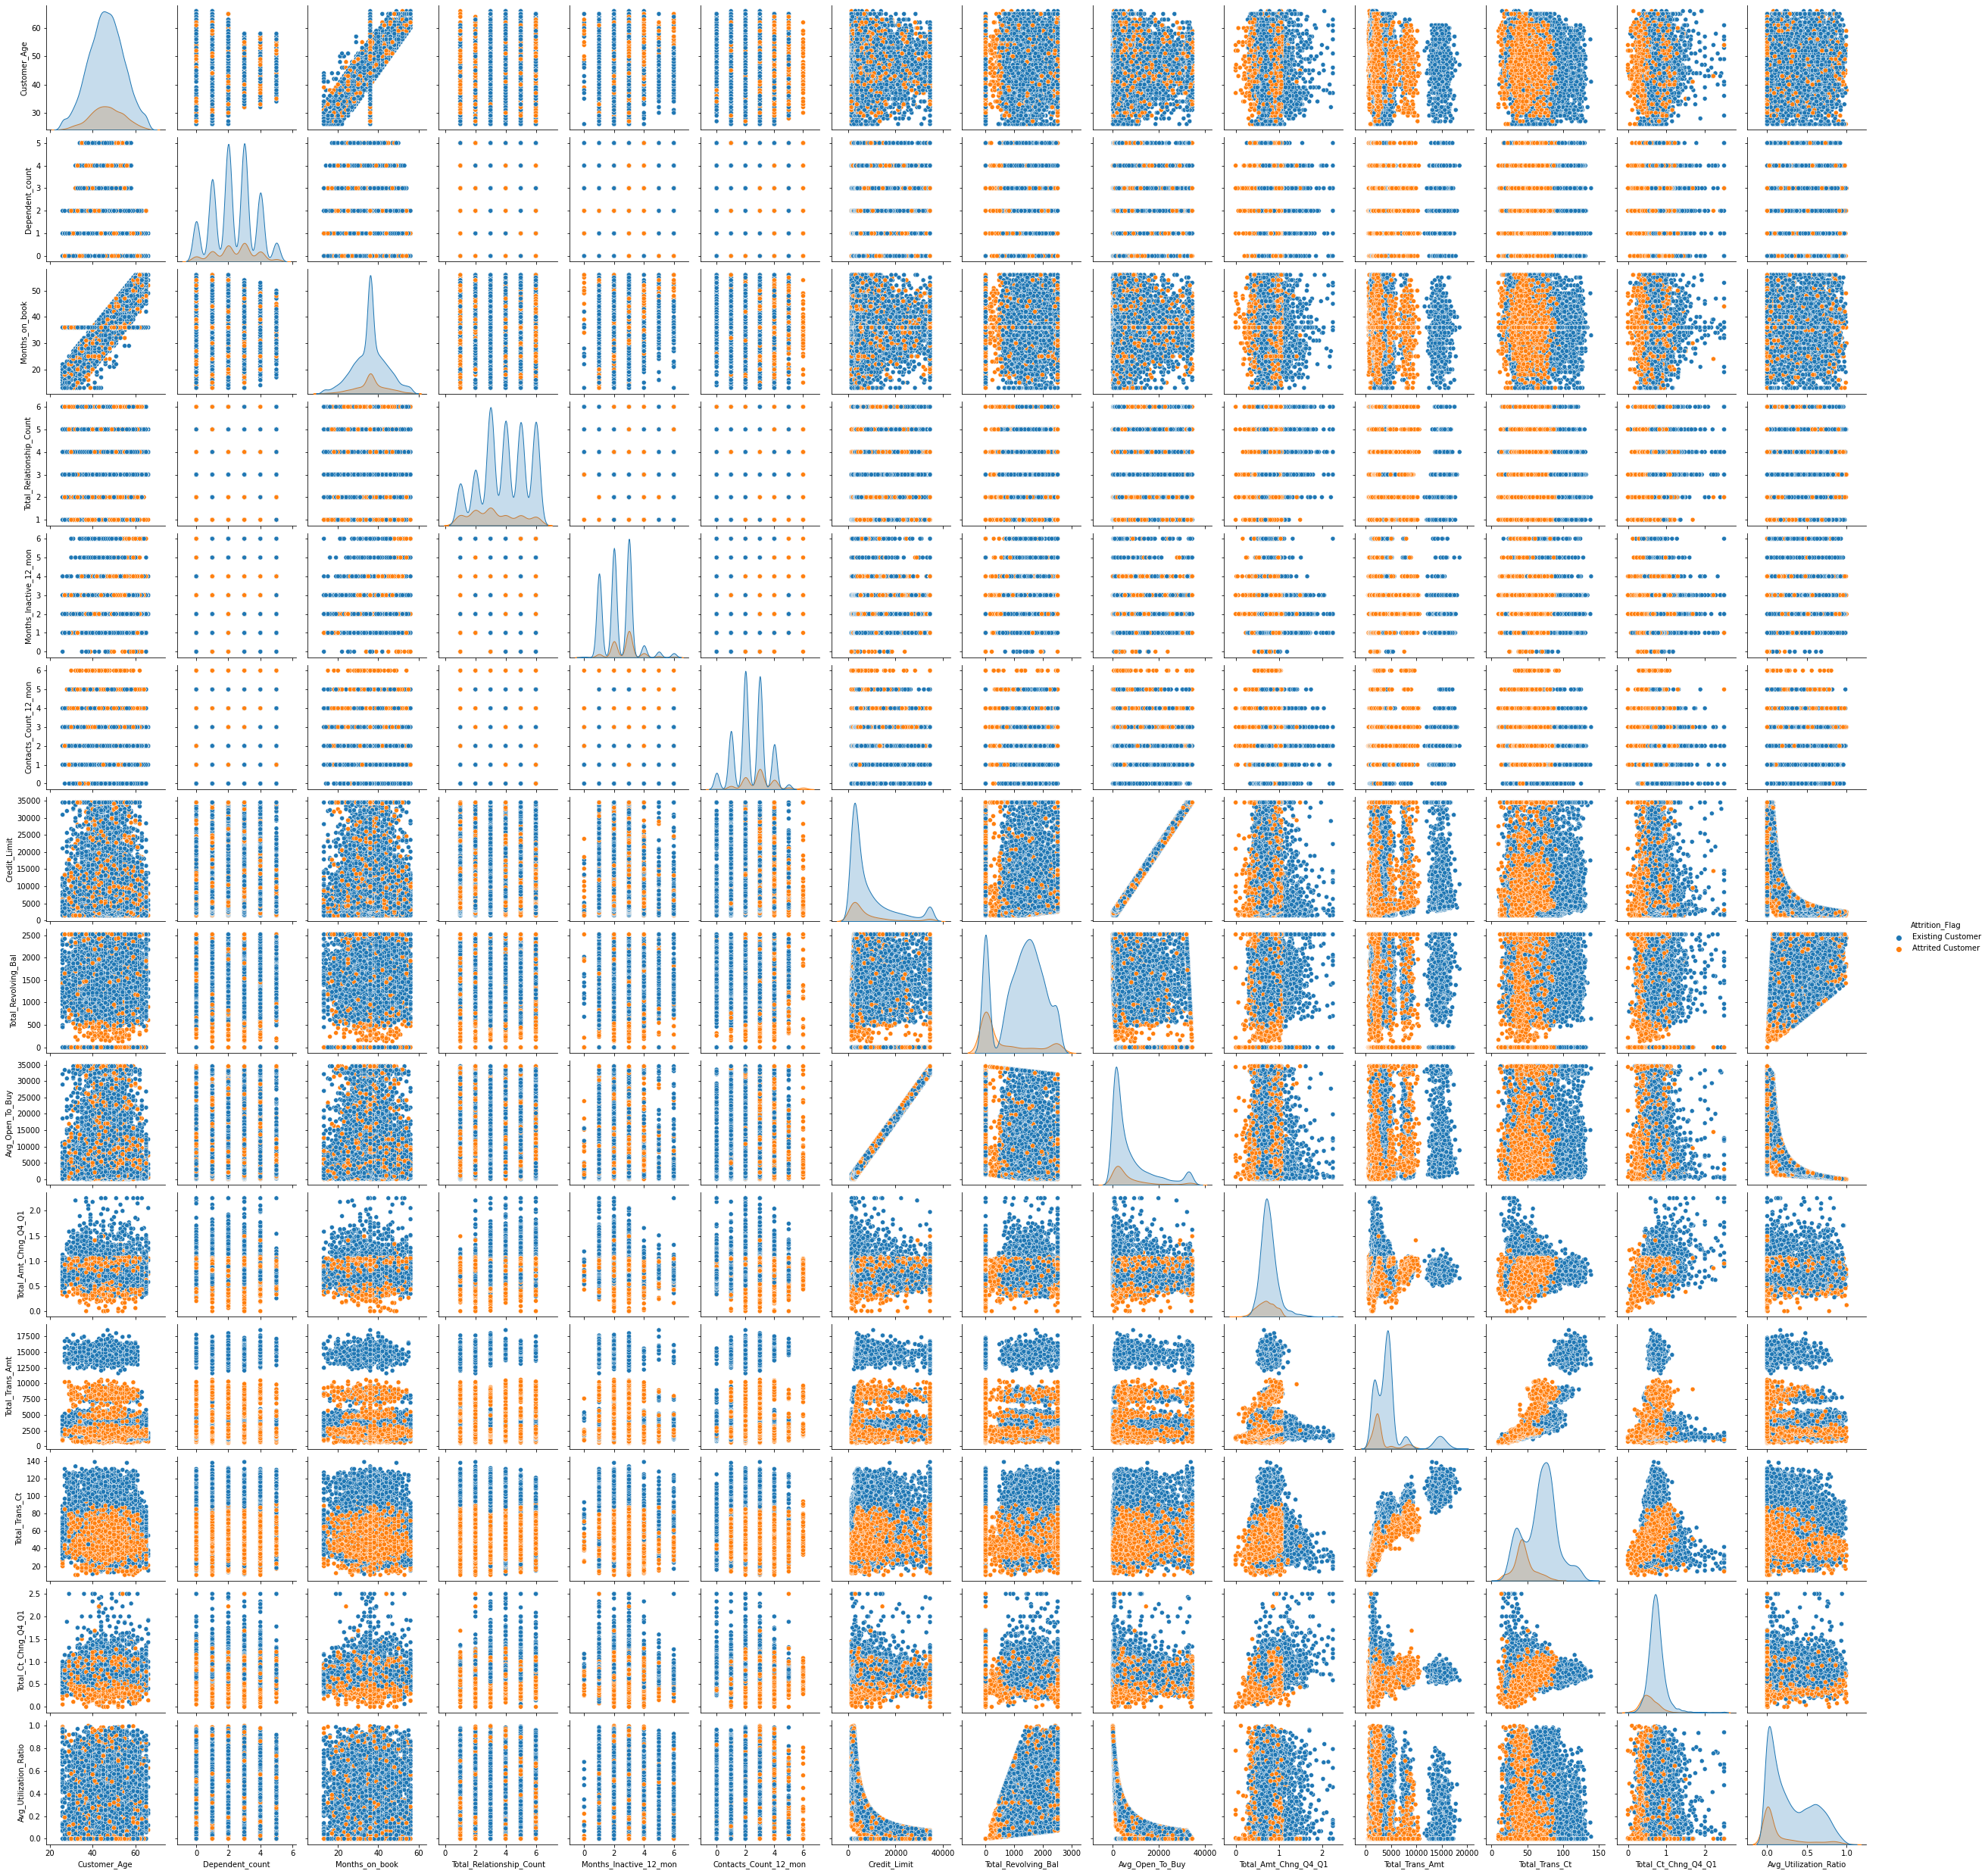

<IPython.core.display.Javascript object>

In [48]:
sns.pairplot(bcData, hue="Attrition_Flag")

- Some features are showign very strong correlation, some features has pattern for attrition. 
- Since plot is not clear here, we'll explore correlation using other plot.

<AxesSubplot:xlabel='Gender', ylabel='Total_Revolving_Bal'>

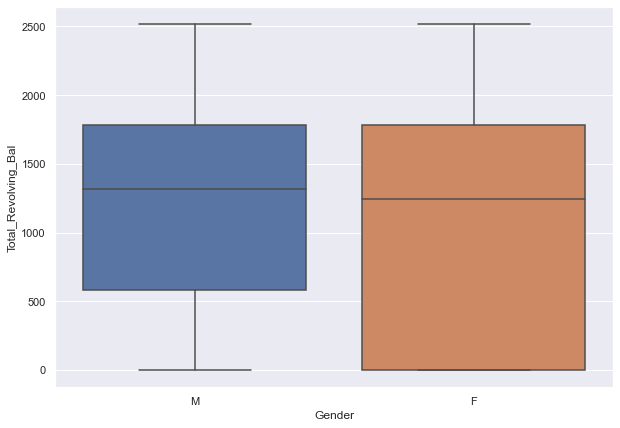

<IPython.core.display.Javascript object>

In [49]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Revolving_Bal", x="Gender", data=bcData, orient="vertical")

- Both genders has same median amount for revolving balance.
- Female revolving balnce is spread more than Male. Male revolving balnce is general starts with higher amount.

<AxesSubplot:xlabel='Gender', ylabel='Credit_Limit'>

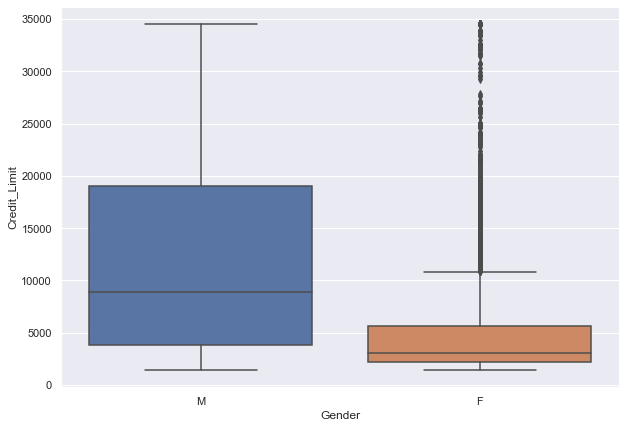

<IPython.core.display.Javascript object>

In [50]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Credit_Limit", x="Gender", data=bcData, orient="vertical")

- Female has lower credit limit but there are many outliers i.e that has much larger credit limit.
- In general Male has More credit limit than female  and its is range of 5000-19000. There is no ouliers.

<AxesSubplot:xlabel='Gender', ylabel='Total_Trans_Ct'>

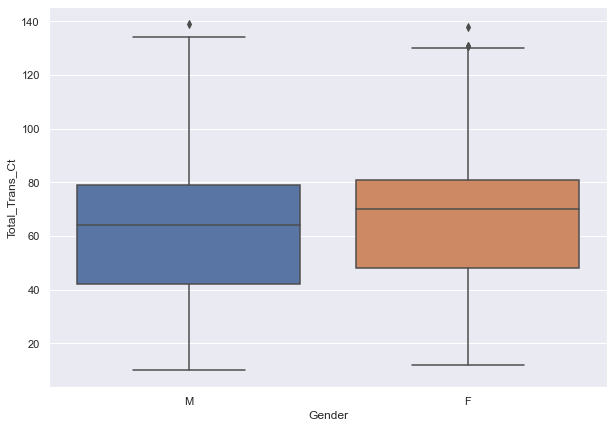

<IPython.core.display.Javascript object>

In [51]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Ct", x="Gender", data=bcData, orient="vertical")

- Male  and female almost similar upper limit of transctions 
- Lower limit of Transaction count for Male slightly more spread than female.

<AxesSubplot:xlabel='Gender', ylabel='Total_Trans_Amt'>

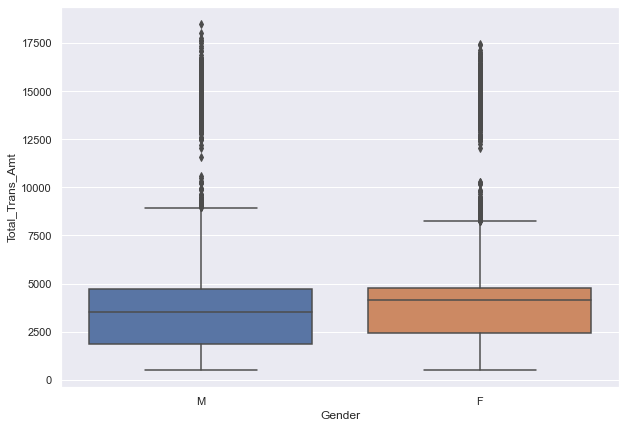

<IPython.core.display.Javascript object>

In [52]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Gender", data=bcData, orient="vertical")

- Male and female has similar transactions amount with outliers but male is spending slightly less than Female.

<AxesSubplot:xlabel='Income_Category', ylabel='Total_Revolving_Bal'>

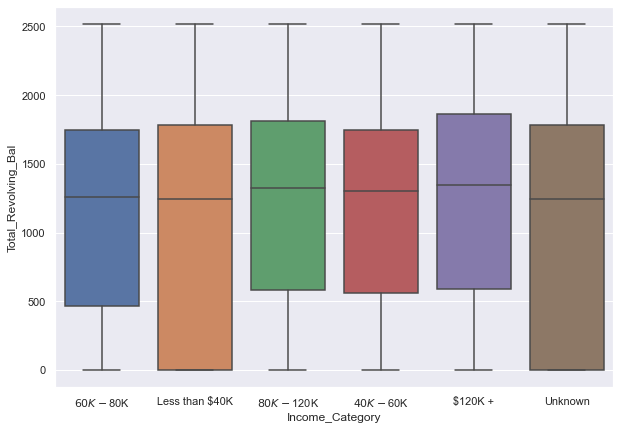

<IPython.core.display.Javascript object>

In [53]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Revolving_Bal", x="Income_Category", data=bcData, orient="vertical"
)

- Total revolving balance for two of the category less then 40k and Unknown is almost similar. Unknown category 
  of customers may be belonging to less then 40K category and they donot wanted to declare their income. 
- All category of income has revolving balance including 120k+ income group.

<AxesSubplot:xlabel='Income_Category', ylabel='Total_Trans_Amt'>

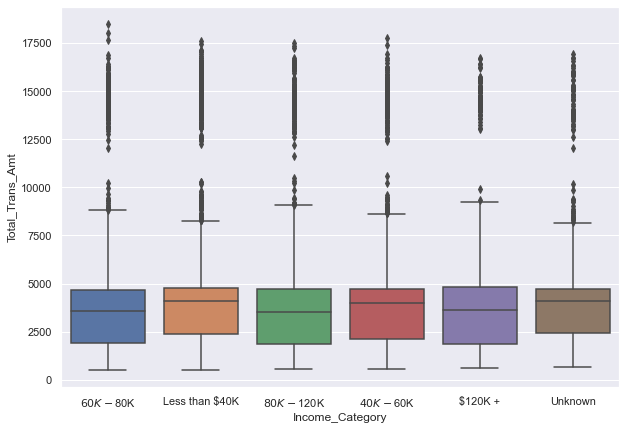

<IPython.core.display.Javascript object>

In [54]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Income_Category", data=bcData, orient="vertical")

- There is clear indicationof spending habit of all category. Their spending habit is in very close range 
  with outliers in all category.
- 120k+ income group has lowest spread including outliers and 60k-80k income group has highest spread 
  including outliers.
- Again, Less than 40k and Unknown income group has matching transaction amount.

<AxesSubplot:xlabel='Card_Category', ylabel='Avg_Utilization_Ratio'>

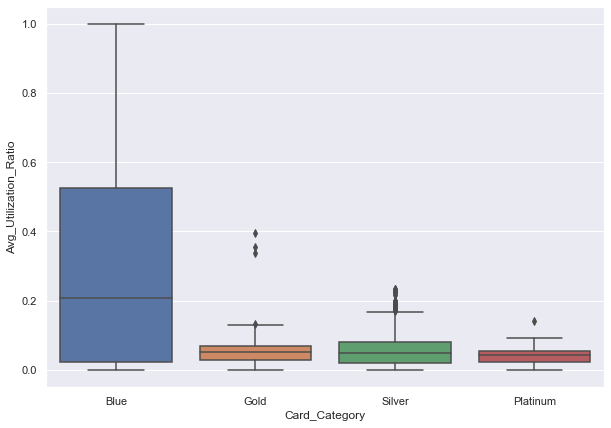

<IPython.core.display.Javascript object>

In [55]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Avg_Utilization_Ratio", x="Card_Category", data=bcData, orient="vertical"
)

- Customers of blue card category has highest utilization ratio.
- Platinum customers has least utilization ratio

<AxesSubplot:xlabel='Income_Category', ylabel='Avg_Utilization_Ratio'>

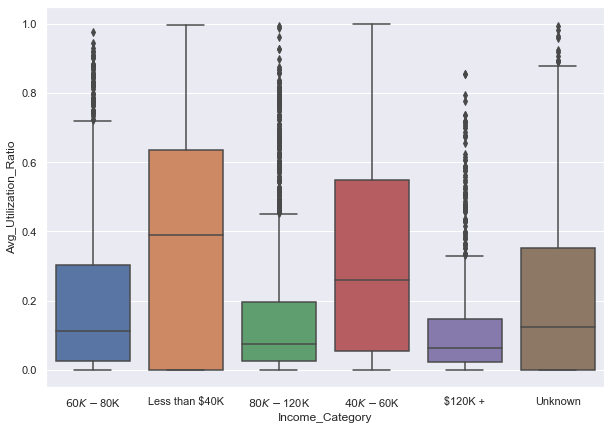

<IPython.core.display.Javascript object>

In [56]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Avg_Utilization_Ratio", x="Income_Category", data=bcData, orient="vertical"
)

- Less than 40k category customer has most utilization ratio. which is obvious because of their income category
  they are dependent on credit card for all expense.
- 120k+ income customer has least utilization ratio, because they donot have to dependent on 
  credit card for all expenses.

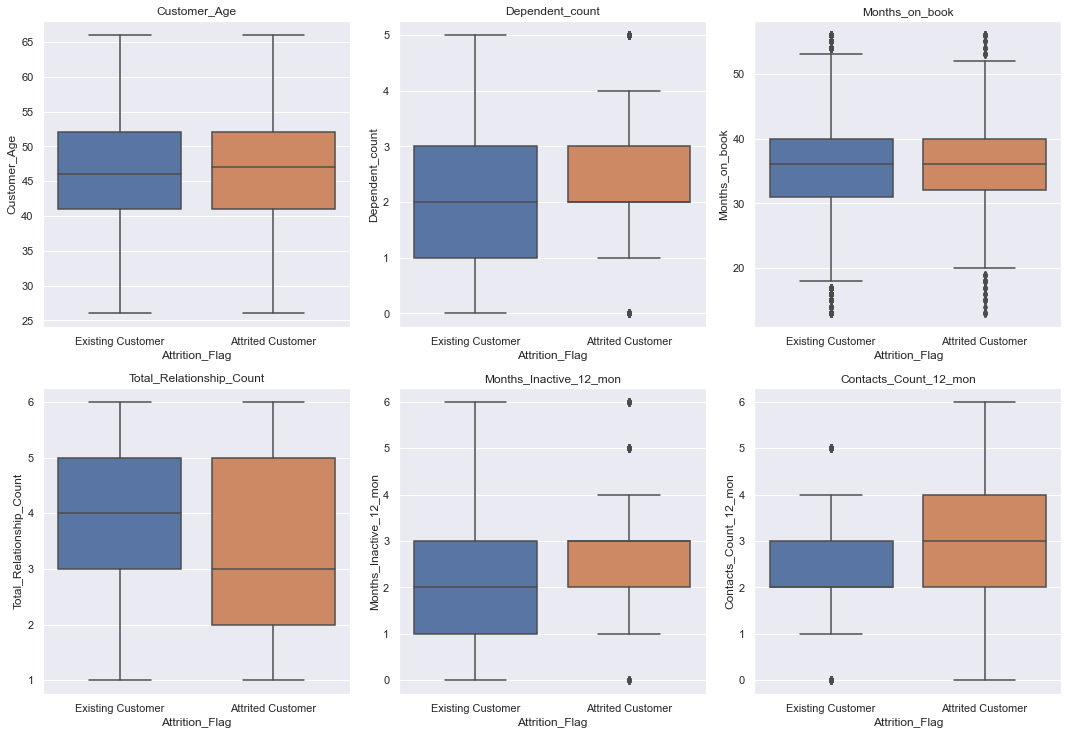

<IPython.core.display.Javascript object>

In [57]:
cols = bcData[
    [
        "Customer_Age",
        "Dependent_count",
        "Months_on_book",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
    ]
].columns.tolist()
plt.figure(figsize=(15, 15))

for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(bcData["Attrition_Flag"], bcData[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Age and Months_on_book has no effect customer attrition.
- Customer with 2 or 3 dependets are most likely to attrition.
- Customer with products between 3 to 5 are less likey to attrition but customer attrition from all product category.
- Customer with more than 2 months inactive are more likey to attrite. They may be using different banks credit card befor efinally closing the account.
- Customer with who has contacted mor ethan 3 times are mor elikely to attrite because they may be trying to resolve some conflict before closign their account.

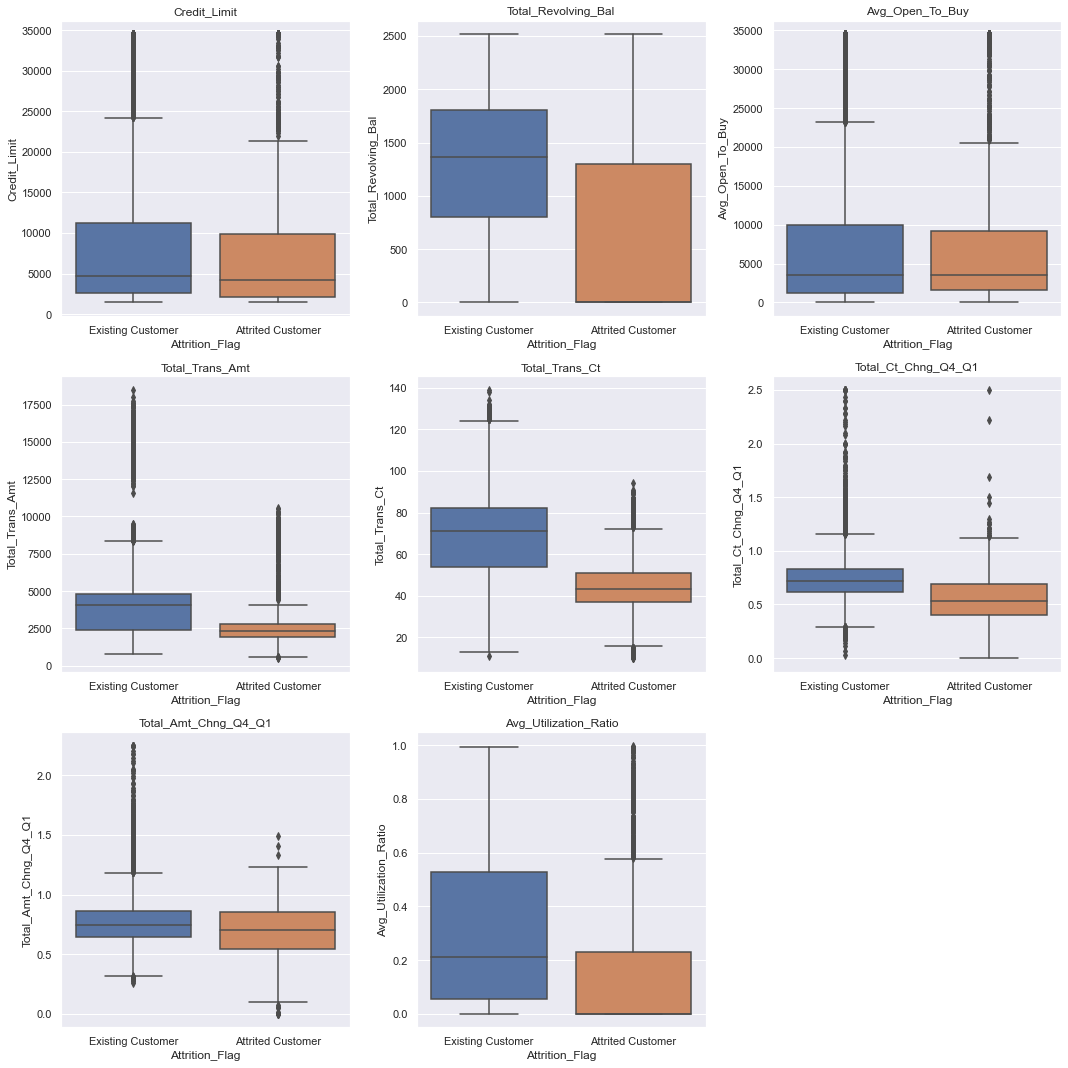

<IPython.core.display.Javascript object>

In [58]:
cols = bcData[
    [
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Total_Amt_Chng_Q4_Q1",
        "Avg_Utilization_Ratio",
    ]
].columns.tolist()
plt.figure(figsize=(15, 15))

for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(bcData["Attrition_Flag"], bcData[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Credit limit and Open to buy has no effect on customer attrition.
- Customer with low revolving balance, low transction amount, less number of transctions, low total Q4-Q1 transction count , low total Q4-Q1 transction amount and low  low utilization is more likey to attrite because they are not too much dependent on credit card for expense.

In [59]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 115)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
-------------------------------------------------------------------------------------------------------------------


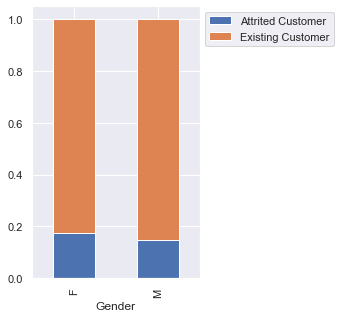

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(bcData, "Gender", "Attrition_Flag")

- There is not much difference in Female and male attrition with female being slightly higher than male.

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
Post-Graduate                  187                780   967
College                        154                859  1013
-------------------------------------------------------------------------------------------------------------------


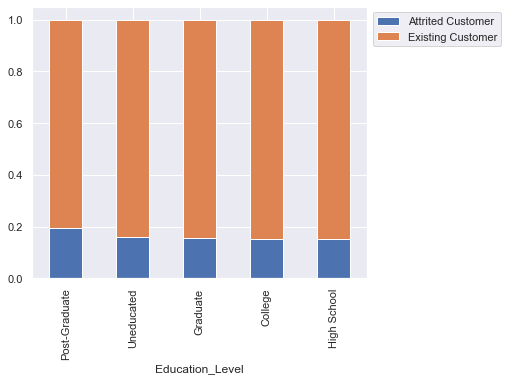

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(bcData, "Education_Level", "Attrition_Flag")

- Except Post-Graduate customers, Attrition rate for all the education level customers are almost same.
- Post-Graduate customer may  be in high income group therefore less dependent on credit card.

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
-------------------------------------------------------------------------------------------------------------------


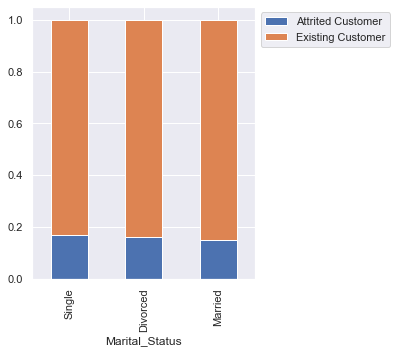

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(bcData, "Marital_Status", "Attrition_Flag")

- There is not much differnce between attrition between Single and married customer.
- Their attrition highest with Single followed by Divorced and Married. This can be due to less household expense 
  for Single and Divorced customers than Married customers.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
Unknown                        187                925   1112
$120K +                        126                601    727
-------------------------------------------------------------------------------------------------------------------


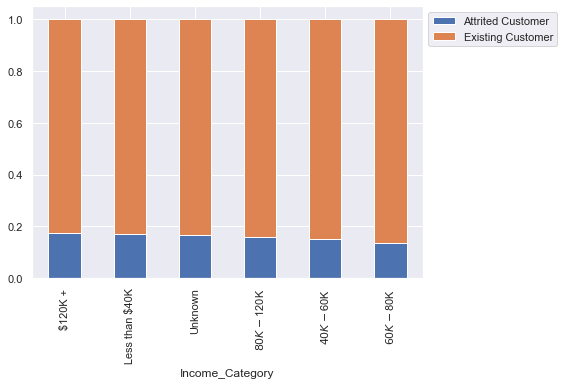

<IPython.core.display.Javascript object>

In [63]:
stacked_barplot(bcData, "Income_Category", "Attrition_Flag")

- Highest attrition is for 120k+ income whic is obvious that they may not need credit card that much. 
- Next highest attrition is for income group less than 40k this may be due to default in payment as seen
  previously they have hight utilization ratio as well as high revolving balance.
- As seen from before Unknown category customers pattern are very closely following Less than 40K income group.
- 60k-80k income group has least attrition ratio.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
-------------------------------------------------------------------------------------------------------------------


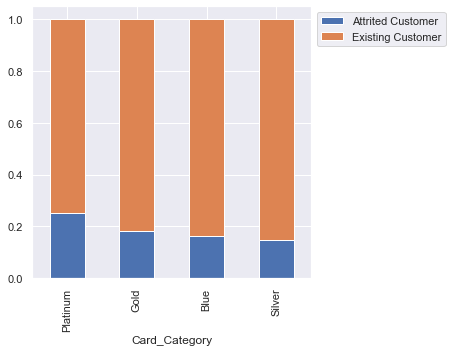

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(bcData, "Card_Category", "Attrition_Flag")

- Platinum card category has most attrition ratio , followed by gold. These customers may be from high income group.
- Silver card type category has least attrition.

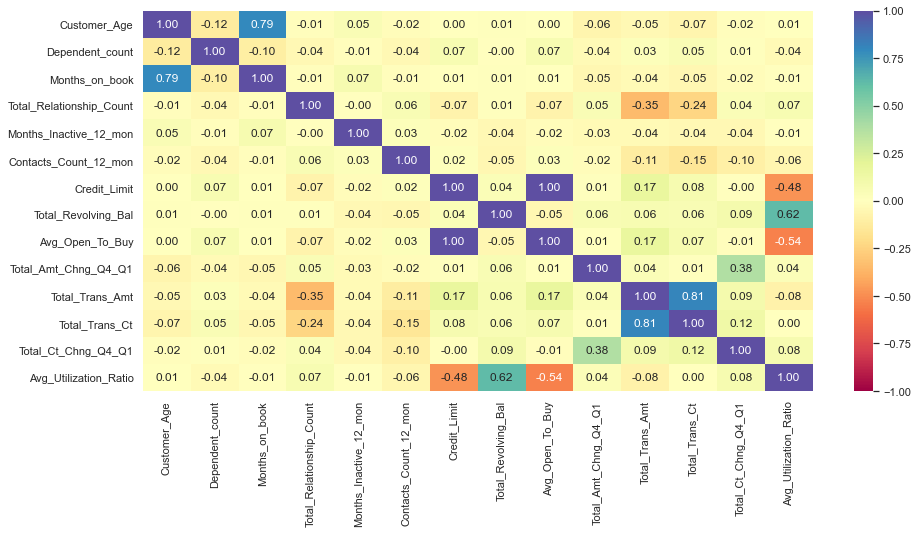

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(15, 7))
sns.heatmap(bcData.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Months_on_book and Customer_age is highly coorelated.
- Avg_Open_To_buy and Credit_Limit is perfectly coorelated we can drop one Avg_Open_To_buy.
- Total_Trans_Amt and Total_Trans_Ct  both are negatively coorelated to Total_Relationship_Count.
- Total_Trans_Amt is highly coorelated to Total_Trans_Amt.
- Avg_Utilization_Ratio and Credit limit and Avg_Utilization_Ratio and Avg_Open_To_Buy is negatively coorelated.
- Avg_Utilization_Ratio and Avg_Open_To_Buy is strongly coorelated.
- Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 is moderately coorelated.

### Data Preparation for Modeling

In [66]:
# Dropping Avg_Open_To_buy column
bcData.drop(columns=["Avg_Open_To_Buy"], inplace=True)

<IPython.core.display.Javascript object>

In [67]:
# Separating target variable and other variables
X = bcData.drop(columns="Attrition_Flag")
X = pd.get_dummies(X)
y = bcData["Attrition_Flag"].apply(lambda x: 0 if x == "Existing Customer" else 1)

<IPython.core.display.Javascript object>

In [68]:
# Splitting data in Temp and Test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Splitting data from temp set to training and validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 33) (2026, 33) (2026, 33)


<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use simple imputer to impute missing values for Income_Category and Marital_Status columns.

In [69]:
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will renounce the credit card but the customer doesn't renounces - Loss of resources
2. Predicting a customer will not renounce the credit card but customer renounces - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not renounce  the credit card but he leaves the credit cad service i.e.  bank losing on a potential source of fee and income.  These customer are not targetted by bank  , when they should have been approached by bank. 

#### How to reduce this loss i.e need to reduce False Negatives?
* Bank should try to maximize the Recall, greater the Recall lesser the chances of false negatives.

**We'll build different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

In [70]:
models = [] # List of empty models

# Adding target models  into list
models.append(("lg", LogisticRegression(random_state = 1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = [] # List of empty results
names = [] # Empty list of names of models

print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall" 
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 1)
    cv_result = cross_val_score(estimator= model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print("{0} : {1}".format(name, cv_result.mean()*100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{0} : {1}".format(name,scores))



Cross-Validation Performance:

lg : 46.71376242804814
Bagging : 77.55886970172685
Random forest : 73.05128205128206
GBM : 81.75824175824175
AdaBoost : 81.75719518576662
Xgboost : 85.5504971219257
dtree : 77.97017268445839

Validation Performance:

lg : 0.5
Bagging : 0.8159509202453987
Random forest : 0.7914110429447853
GBM : 0.8680981595092024
AdaBoost : 0.8588957055214724
Xgboost : 0.9049079754601227
dtree : 0.8190184049079755


<IPython.core.display.Javascript object>

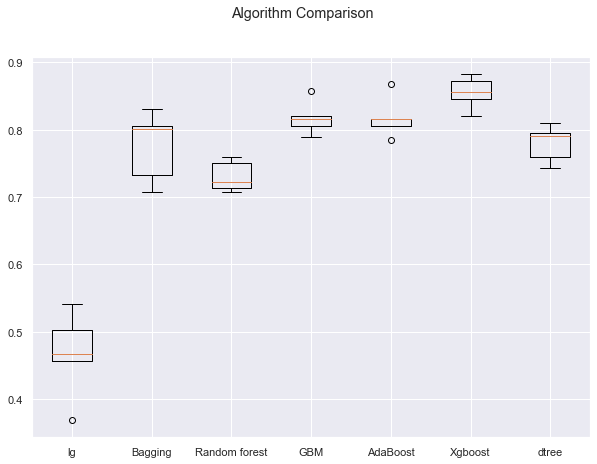

<IPython.core.display.Javascript object>

In [71]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- XGBoost is giving highest cross-validated recall score followed by Adaboost and GBM.
- The boxplot shows that the performance of xgboost is consistent but there is 2 outlier for Adaboost, and one outliner for GradientBoost.

## Hyperparameter Tuning

**We will tune Gradinet Boost, Xgboost and AdaBoost models using RandomizedSearchCV. We will also compare the performance of  these the methods using randomized search.**

**using these two functions from case strudy to calculate metrics and confusion matrix.**

In [72]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [73]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Gradient Boosting Classifier

### RandomizedSearchCV

In [74]:
# defining model.
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'n_estimators': 100, 'max_features': 0.7} with CV score=0.8217006802721087:


<IPython.core.display.Javascript object>

In [75]:
# building model with best parameters
gbm_tuned1 = GradientBoostingClassifier(
    n_estimators=100, subsample=0.8, max_features=0.7, random_state=1
)

# Fit the model on training data
gbm_tuned1.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

In [76]:
# Calculating different metrics on train set
gbm_random_train = model_performance_classification_sklearn(
    gbm_tuned1, X_train, y_train
)
print("Training performance:")
gbm_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.974   0.880      0.956 0.916

<IPython.core.display.Javascript object>

In [77]:
# Calculating different metrics on validation set
gbm_random_val = model_performance_classification_sklearn(gbm_tuned1, X_val, y_val)
print("Validation performance:")
gbm_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.971   0.877      0.941 0.908

<IPython.core.display.Javascript object>

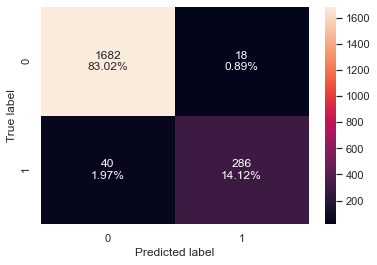

<IPython.core.display.Javascript object>

In [78]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_tuned1, X_val, y_val)

- Recall score of gradient boost training score is close to validaiton score .
- Precision score is also very close. 
- Overall model is geranlized model.

## AdaBoost

### RandomizedSearchCV

In [79]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_adb_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_adb_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_adb_cv.best_params_,randomized_adb_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8534641548927263:
CPU times: user 2.08 s, sys: 185 ms, total: 2.26 s
Wall time: 1min 29s


<IPython.core.display.Javascript object>

In [80]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [81]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.996   0.985      0.990 0.987

<IPython.core.display.Javascript object>

In [82]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.969   0.877      0.926 0.901

<IPython.core.display.Javascript object>

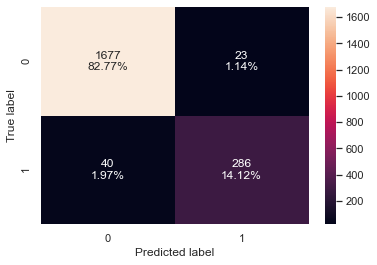

<IPython.core.display.Javascript object>

In [83]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

- Training recall score and Validation recall has good difference. We can say model is overfitting.
- Precision score has good differnence too between training set and validation set.
- It will not be good model to identify potential customer who will renounce the credit card service.

## XGBoost

### RandomizedSearchCV

In [84]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned1 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned1.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned1.best_params_,xgb_tuned1.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9682260596546313:
CPU times: user 1.53 s, sys: 158 ms, total: 1.68 s
Wall time: 1min 2s


<IPython.core.display.Javascript object>

In [85]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=0,
    subsample=0.8,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=2,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=10, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [86]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.847   0.986      0.513 0.674

<IPython.core.display.Javascript object>

In [87]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.844   0.960      0.508 0.665

<IPython.core.display.Javascript object>

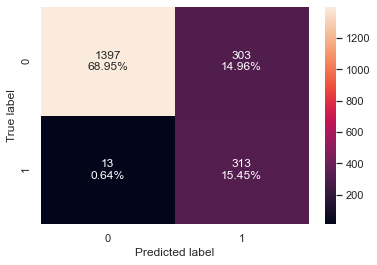

<IPython.core.display.Javascript object>

In [88]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

- The validation recall  and Training recall scores are very close.
- Precision score between training set and validation set are very close too, but score is low.
- Overall model has generalized one. 

### Oversampling train data using SMOTE (Synthetic Minority Over Sampling Technique)

In [89]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 33)
After UpSampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

In [90]:
results = []  # Intialize the list with empty results
names = []  # Intialize the list with empty model names

print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{0} : {1}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{0} : {1}".format(name, scores))


Cross-Validation Performance:

lg : 83.15414958917818
Bagging : 96.54832688718274
Random forest : 96.9407338990552
GBM : 97.33283303507861
AdaBoost : 96.5287767707672
Xgboost : 98.09771209759663
dtree : 95.13625430545132

Validation Performance:

lg : 0.8312883435582822
Bagging : 0.8650306748466258
Random forest : 0.8006134969325154
GBM : 0.8926380368098159
AdaBoost : 0.8619631901840491
Xgboost : 0.9049079754601227
dtree : 0.8128834355828221


<IPython.core.display.Javascript object>

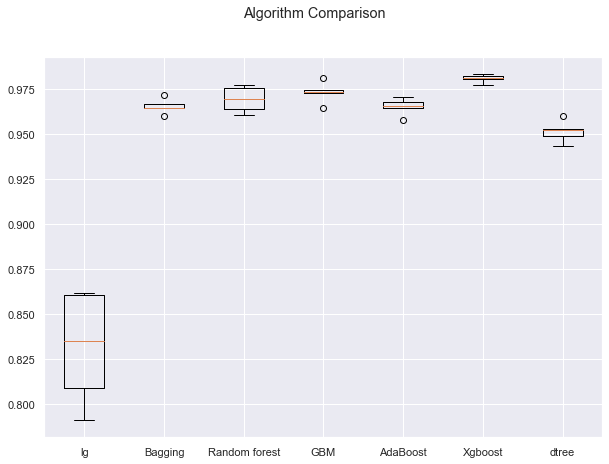

<IPython.core.display.Javascript object>

In [91]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- XGBoost is giving highest cross-validated recall followed by GBM and Adaboost.
- The boxplot shows that the performance of xgboost is consistent but there is 2 outlier for Gradient boost and one outlier for Adaboost.

### Gradient Boosting Classifier

### RandomizedSearchCV oversampled

In [92]:
# defining model.
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 1, 'n_estimators': 30, 'max_features': 0.8} with CV score=0.9450930362331389:


<IPython.core.display.Javascript object>

In [105]:
# building model with best parameters
gbm_tuned1_over = GradientBoostingClassifier(
    n_estimators=30, subsample=1, max_features=0.8, random_state=1
)

# Fit the model on training data
gbm_tuned1_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.8, n_estimators=30, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

In [94]:
# Calculating different metrics on train set
gbm_random_train_over = model_performance_classification_sklearn(
    gbm_tuned1_over, X_train_over, y_train_over
)
print("Training performance:")
gbm_random_train_over

Training performance:


Accuracy  Recall  Precision    F1
0     0.981   0.981      0.982 0.981

<IPython.core.display.Javascript object>

In [95]:
# Calculating different metrics on validation set
gbm_random_val_over = model_performance_classification_sklearn(
    gbm_tuned1_over, X_val, y_val
)
print("Validation performance:")
gbm_random_val_over

Validation performance:


Accuracy  Recall  Precision    F1
0     0.962   0.893      0.871 0.882

<IPython.core.display.Javascript object>

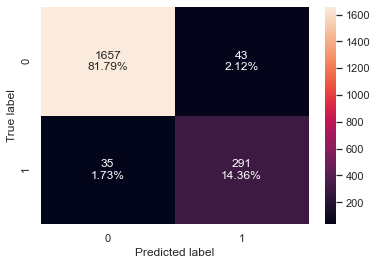

<IPython.core.display.Javascript object>

In [96]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_tuned1_over, X_val, y_val)

- Training recall score and Validation recall has good difference. We can say model is overfitting.
- Precision score has good differnence too between training set and validation set.
- It will not be good model to identify potential customer who will renounce the credit card service.

## Ada Boost Classifier
### RandomizedSearchCV oversampled

In [99]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.934111681964248:
CPU times: user 5.42 s, sys: 179 ms, total: 5.6 s
Wall time: 3min 9s


<IPython.core.display.Javascript object>

In [100]:
# building model with best parameters
ada_tuned1_over = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.01,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
ada_tuned1_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

In [101]:
# Calculating different metrics on train set
ada_random_train_over = model_performance_classification_sklearn(
    ada_tuned1_over, X_train_over, y_train_over
)
print("Training performance:")
ada_random_train_over

Training performance:


Accuracy  Recall  Precision    F1
0     0.937   0.956      0.920 0.938

<IPython.core.display.Javascript object>

In [102]:
# Calculating different metrics on validation set
ada_random_val_over = model_performance_classification_sklearn(
    ada_tuned1_over, X_val, y_val
)
print("Validation performance:")
ada_random_val_over

Validation performance:


Accuracy  Recall  Precision    F1
0     0.912   0.877      0.673 0.762

<IPython.core.display.Javascript object>

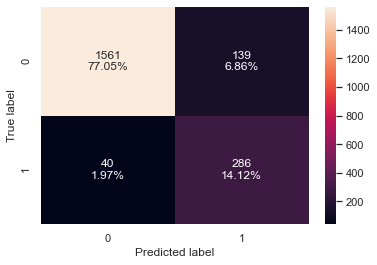

<IPython.core.display.Javascript object>

In [103]:
# creating confusion matrix
confusion_matrix_sklearn(ada_tuned1_over, X_val, y_val)

- Training recall score and Validation recall has good difference. We can say model is overfitting.
- Precision score has good differnence too between training set and validation set.
- It will not be good model to identify potential customer who will renounce the credit card service.

In [104]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned1 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned1.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned1.best_params_,xgb_tuned1.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9984313725490196:
CPU times: user 2.04 s, sys: 158 ms, total: 2.2 s
Wall time: 1min 53s


<IPython.core.display.Javascript object>

In [106]:
# building model with best parameters
xgb_tuned1_over = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.8,
    learning_rate=0.05,
    eval_metric="logloss",
    max_depth=2,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned1_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=10, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [107]:
# Calculating different metrics on train set
xgb_random_train_over = model_performance_classification_sklearn(
    xgb_tuned1_over, X_train_over, y_train_over
)
print("Training performance:")
xgb_random_train_over

Training performance:


Accuracy  Recall  Precision    F1
0     0.788   0.999      0.702 0.825

<IPython.core.display.Javascript object>

In [109]:
# Calculating different metrics on validation set
xgb_random_val_over = model_performance_classification_sklearn(
    xgb_tuned1_over, X_val, y_val
)
print("Validation performance:")
xgb_random_val_over

Validation performance:


Accuracy  Recall  Precision    F1
0     0.658   1.000      0.320 0.485

<IPython.core.display.Javascript object>

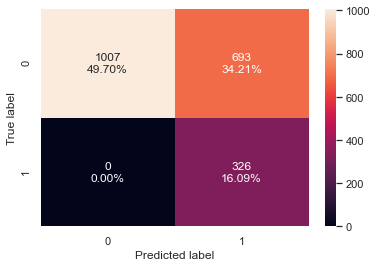

<IPython.core.display.Javascript object>

In [110]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1_over, X_val, y_val)

- Recall score of training is close to validaiton score .
- Precision of training and validation has large difference. 
- Overall model is geranlized model.

### Undersampling train data using Random Under Sampler

In [111]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [112]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 33)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [113]:
results = []  # Intialize the list with empty results
names = []  # Intialize the list with empty model names

print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{0} : {1}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{0} : {1}".format(name, scores))


Cross-Validation Performance:

lg : 0.8104500261643119
Bagging : 0.9159863945578233
Random forest : 0.9231658817373104
GBM : 0.9395499738356883
AdaBoost : 0.9354788069073784
Xgboost : 0.9518524332810048
dtree : 0.8729461015175299

Validation Performance:

lg : 0.8374233128834356
Bagging : 0.9233128834355828
Random forest : 0.941717791411043
GBM : 0.9631901840490797
AdaBoost : 0.9693251533742331
Xgboost : 0.9601226993865031
dtree : 0.8987730061349694


<IPython.core.display.Javascript object>

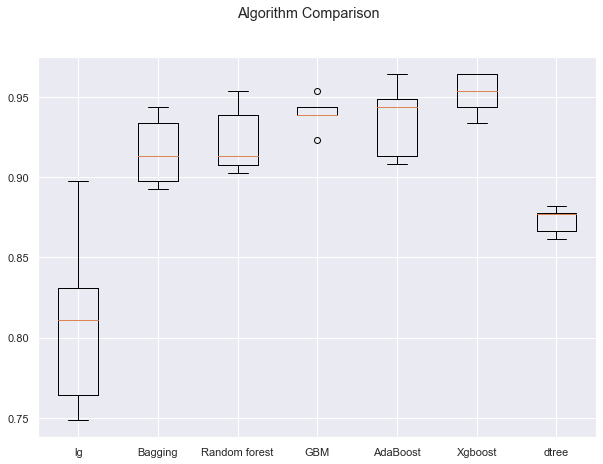

<IPython.core.display.Javascript object>

In [114]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- XGBoostand  is giving the highest cross-validated recall followed by Adaboost and Gradientboost model.
- The boxplot shows that the performance of xgboost  and adaboost is consistent but GBM has two outlier.

## Gradient Boosting Classifier

### RandomizedSearchCV undersampled

In [116]:
# defining model.
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 1, 'n_estimators': 90, 'max_features': 0.8} with CV score=0.9528937728937729:


<IPython.core.display.Javascript object>

In [117]:
# building model with best parameters
gbm_tuned1_un = GradientBoostingClassifier(
    n_estimators=90, subsample=1, max_features=0.8, random_state=1
)
# Fit the model on training data
gbm_tuned1_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_features=0.8, n_estimators=90, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

In [118]:
# Calculating different metrics on train set
gbm_random_train_un = model_performance_classification_sklearn(
    gbm_tuned1_un, X_train_un, y_train_un
)
print("Training performance:")
gbm_random_train_un

Training performance:


Accuracy  Recall  Precision    F1
0     0.972   0.978      0.967 0.973

<IPython.core.display.Javascript object>

In [119]:
# Calculating different metrics on validation set
gbm_random_val_un = model_performance_classification_sklearn(
    gbm_tuned1_un, X_val, y_val
)
print("Validation performance:")
gbm_random_val_un

Validation performance:


Accuracy  Recall  Precision    F1
0     0.940   0.954      0.746 0.837

<IPython.core.display.Javascript object>

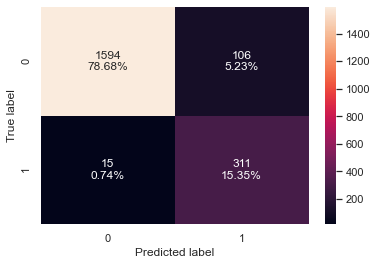

<IPython.core.display.Javascript object>

In [120]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_tuned1_un, X_val, y_val)

In [ ]:
- Recall score of gradient boost training score is close to validaiton score .
- But Precision score ihas large difference between them. 
- Overall model is geranlized model.

## AdaBoostClassifier

### RandomizedSearchCV undersampled

In [121]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9518524332810048:
CPU times: user 1.38 s, sys: 247 ms, total: 1.63 s
Wall time: 35.4 s


<IPython.core.display.Javascript object>

In [122]:
# building model with best parameters
ada_tuned1_un = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
# Fit the model on training data
ada_tuned1_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [123]:
# Calculating different metrics on train set
ada_random_train_un = model_performance_classification_sklearn(
    ada_tuned1_un, X_train_un, y_train_un
)
print("Training performance:")
ada_random_train_un

Training performance:


Accuracy  Recall  Precision    F1
0     0.988   0.994      0.983 0.988

<IPython.core.display.Javascript object>

In [124]:
# Calculating different metrics on validation set
ada_random_val_un = model_performance_classification_sklearn(
    ada_tuned1_un, X_val, y_val
)
print("Validation performance:")
ada_random_val_un

Validation performance:


Accuracy  Recall  Precision    F1
0     0.941   0.975      0.740 0.841

<IPython.core.display.Javascript object>

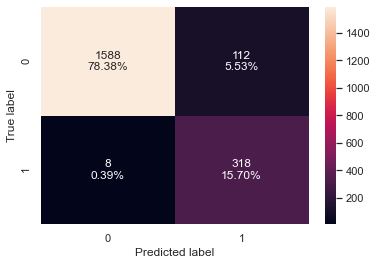

<IPython.core.display.Javascript object>

In [125]:
# creating confusion matrix
confusion_matrix_sklearn(ada_tuned1_un, X_val, y_val)

- Similar to Gradient boost, Recall score of training is close to validaiton score .
- But Precision score has large difference between them. 
- Overall model is geranlized model.

## XGBClassifier

### RandomizedSearchCV undersampled

In [126]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned1 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned1.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned1.best_params_,xgb_tuned1.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 1} with CV score=1.0:
CPU times: user 969 ms, sys: 93.4 ms, total: 1.06 s
Wall time: 19.9 s


<IPython.core.display.Javascript object>

In [127]:
# building model with best parameters
xgb_tuned1_un = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.9,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned1_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [128]:
# Calculating different metrics on train set
xgb_random_train_un = model_performance_classification_sklearn(
    xgb_tuned1_un, X_train_un, y_train_un
)
print("Training performance:")
xgb_random_train_un

Training performance:


Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667

<IPython.core.display.Javascript object>

In [129]:
# Calculating different metrics on validation set
xgb_random_val_un = model_performance_classification_sklearn(
    xgb_tuned1_un, X_val, y_val
)
print("Validation performance:")
xgb_random_val_un

Validation performance:


Accuracy  Recall  Precision    F1
0     0.161   1.000      0.161 0.277

<IPython.core.display.Javascript object>

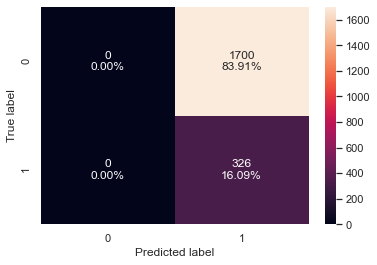

<IPython.core.display.Javascript object>

In [130]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1_un, X_val, y_val)

- Recall score of training score and validaiton  is perfect 1. Which is very unlikey situation in real world.
- But Precision score has large difference between them. 
- Model looks generalized but it amy not work in real world.

## Comparing all models

In [134]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_random_train.T,
        gbm_random_train_over.T,
        gbm_random_train_un.T,
        Adaboost_random_train.T,
        ada_random_train_over.T,
        ada_random_train_un.T,
        xgboost_random_train.T,
        xgb_random_train_over.T,
        xgb_random_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GradientBoost Tuned Random search",
    "GradientBoost Oversampled Random search",
    "GradientBoost Undersampled Random search",
    "AdaBoost Tuned Random search",
    "AdaBoost Tuned Oversampled Random search",
    "AdaBoost Tuned Undersampled Random search",
    "Xgboost Tuned Random Search",
    "Xgboost Tuned Oversampled Random Search",
    "Xgboost Tuned Undersampled Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


GradientBoost Tuned Random search  \
Accuracy                               0.974   
Recall                                 0.880   
Precision                              0.956   
F1                                     0.916   

           GradientBoost Oversampled Random search  \
Accuracy                                     0.981   
Recall                                       0.981   
Precision                                    0.982   
F1                                           0.981   

           GradientBoost Undersampled Random search  \
Accuracy                                      0.972   
Recall                                        0.978   
Precision                                     0.967   
F1                                            0.973   

           AdaBoost Tuned Random search  \
Accuracy                          0.996   
Recall                            0.985   
Precision                         0.990   
F1                                0.987   

           AdaBoost Tuned Oversampled Random search  \
Accuracy                                      0.937   
Recall                                        0.956   
Precision                                     0.920   
F1                                            0.938   

           AdaBoost Tuned Undersampled Random search  \
Accuracy                                       0.988   
Recall                                         0.994   
Precision                                      0.983   
F1                                             0.988   

           Xgboost Tuned Random Search  \
Accuracy                         0.847   
Recall                           0.986   
Precision                        0.513   
F1                               0.674   

           Xgboost Tuned Oversampled Random Search  \
Accuracy                                     0.788   
Recall                                       0.999   
Precision                                    0.702   
F1                                           0.825   

           Xgboost Tuned Undersampled Random Search  
Accuracy                                      0.500  
Recall                                        1.000  
Precision                                     0.500  
F1                                            0.667

<IPython.core.display.Javascript object>

In [136]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_random_val.T,
        gbm_random_val_over.T,
        gbm_random_val_un.T,
        Adaboost_random_val.T,
        ada_random_val_over.T,
        ada_random_val_un.T,
        xgboost_random_val.T,
        xgb_random_val_over.T,
        xgb_random_val_un.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "GradientBoost Tuned Random search",
    "GradientBoost Oversampled Random search",
    "GradientBoost Undersampled Random search",
    "AdaBoost Tuned Random search",
    "AdaBoost Tuned Oversampled Random search",
    "AdaBoost Tuned Undersampled Random search",
    "Xgboost Tuned Random Search",
    "Xgboost Tuned Oversampled Random Search",
    "Xgboost Tuned Undersampled Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


GradientBoost Tuned Random search  \
Accuracy                               0.971   
Recall                                 0.877   
Precision                              0.941   
F1                                     0.908   

           GradientBoost Oversampled Random search  \
Accuracy                                     0.962   
Recall                                       0.893   
Precision                                    0.871   
F1                                           0.882   

           GradientBoost Undersampled Random search  \
Accuracy                                      0.940   
Recall                                        0.954   
Precision                                     0.746   
F1                                            0.837   

           AdaBoost Tuned Random search  \
Accuracy                          0.969   
Recall                            0.877   
Precision                         0.926   
F1                                0.901   

           AdaBoost Tuned Oversampled Random search  \
Accuracy                                      0.912   
Recall                                        0.877   
Precision                                     0.673   
F1                                            0.762   

           AdaBoost Tuned Undersampled Random search  \
Accuracy                                       0.941   
Recall                                         0.975   
Precision                                      0.740   
F1                                             0.841   

           Xgboost Tuned Random Search  \
Accuracy                         0.844   
Recall                           0.960   
Precision                        0.508   
F1                               0.665   

           Xgboost Tuned Oversampled Random Search  \
Accuracy                                     0.658   
Recall                                       1.000   
Precision                                    0.320   
F1                                           0.485   

           Xgboost Tuned Undersampled Random Search  
Accuracy                                      0.161  
Recall                                        1.000  
Precision                                     0.161  
F1                                            0.277

<IPython.core.display.Javascript object>

- We'll not be considering XGboost model with recall score of perfect 1 because the will fail in production.
- Lets consder other recall score which is greater than 0.9
  * GradientBoost Undersampled Random search model close to 0.97 score for recall, precision and accuracy in training  and for validation recall is 0.95 and precison and accuracy is 0.746 and 0.94.
  * AdaBoost Tuned Undersampled Random search model has close to 0.98 score for recall, precision and accuracy in training  and for validation recall is 0.975 and precison and accuracy is 0.74 and 0.940.
  * Xgboost Tuned Random Search model has close to 0.98 :recall, accuracy:0.847 and precision-0.513 in training  and for validation recall is 0.96 and precison:508 and accuracy:0.844.
- Since the expected criteria for model selection is "Recall on the test set is expected to be > 0.95, and precision and accuracy is expected to be > 0.70"  , it will be `AdaBoost Tuned Undersampled Random search`
- As per my opinion, since undersampled model is not reliable because of limitation in variation of dataset. This model might fail in production. So , i'll prefer `Xgboost Tuned Random Search` model

#### Performance on the test set

In [137]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned1, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.160   1.000      0.160 0.276

<IPython.core.display.Javascript object>

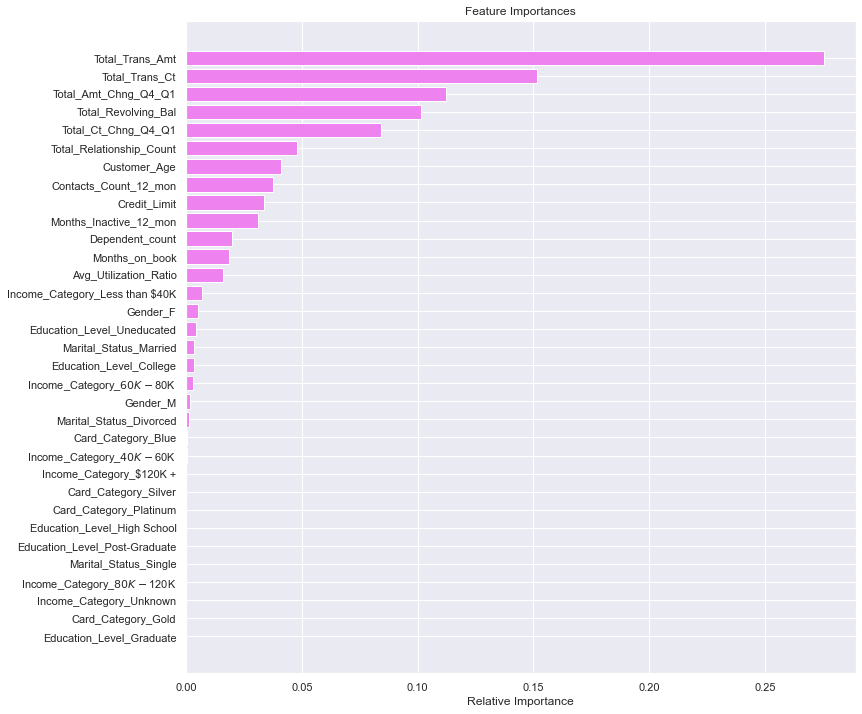

<IPython.core.display.Javascript object>

In [139]:
feature_names = X.columns
importances = ada_tuned1_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Transaction_Amt is the most important feature, followed by Total_Trans_ct, Total_Amt_Chng_Q4_Q1, Total_Revolving_Bal and Total_Ct_Chng_Q4_Q1.

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing
- We are doing missing value imputation for the whole data, so that if there is any missing value in the 
data in future that can be taken care of.

In [140]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Total_Amt_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

In [141]:
# Separating target variable and other variables
X = bcData.drop(columns="Attrition_Flag")
Y = bcData["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [142]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


<IPython.core.display.Javascript object>

In [144]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "AdaBoost",
            AdaBoostClassifier(
                n_estimators=90,
                learning_rate=0.1,
                random_state=1,
                base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Trans_Amt',
                            

<IPython.core.display.Javascript object>

## Business Recommendations

* Largest user of credit card is from income group less then 40K. At the same time they are also the one who is renouncing the credit card service . Bank should provide easy term of payment or grace period to encourage these customer to maintain  their account.
* High income group is also renouncing the credit card service, bank should periodically offer them discount based on  number of transaction count or amount.
* All the category of customer has revolving balance. Bank should offer them longer revolving period for payment.
* Customer who has contacted Bank for more than 3 times are more likely to discontinue the service. They may be contacting to fix their service problems. Bank should be contacting such customer to get feedback and proper closure of their problem.
* If a account is lying inactive for longer duration, customer might have moved to different bank’s credit card. Bank should proactively contact such customer to understand their expectation and what other competitor are offering which is encouraging customer to renounce the account.
* Customer who has more  than 2 dependents are also leaving frequently. Bank can offer discount on products/service for amount crossing certain limit or same purchased made for more than 2 people.
* Customer who has less utilization ratio or lower transaction amount is also renouncing the service. To hold these customers, bank should  come with offer of bonus or additional cash back if customer reaches certain utilization ratio or amount limit.
* Customer who has lower ratio of Q4-Q1 amount or transactions has more probability of leaving the service. Since, Q4 is holiday season, bank should come up the plan to offer perks like discount, extended warranty etc. if any product and service purchased using credit card during that quarter.
* Customer who has  lower number of products(Total_Relationship_Count) from same bank find it easier to dispose off all the products and move to new bank. Bank should approach such customer with different products offered by customer like  discounted personal loan, saving  or checking account etc.
* Card category platinum has highest attrition and they has the least utilization ratio as well. This may be because they belong to high income group and don’t see any utilization of credit card. Bank can offer them different products and services, which might interest them and credit card service is tied to it.